In [1]:
import matplotlib.pyplot as plt 
import seaborn as sb 
import pandas as pd 
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('F:\\vs codes\\ML_Setup project\\data\\raw_data.csv',header=1)
display(dataset.head(),dataset.shape)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.0,Female,No,Sun,Dinner,2
1,10.34,1.6,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,3.3,Male,No,Sun,Dinner,2
4,24.59,3.6,Female,No,Sun,Dinner,4


(246, 7)

In [3]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(245, 7)

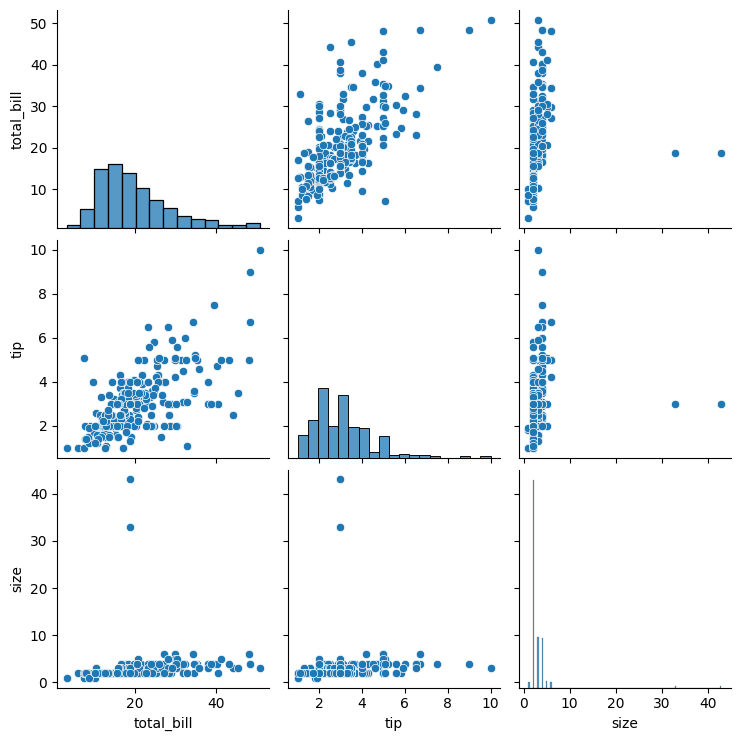

In [4]:
sb.pairplot(dataset)

In [5]:

dataset.describe()

,total_bill,tip,size
count,245.000000,245.000000,245.000000
mean,19.805429,2.980408,2.861224
std,8.873969,1.379929,3.362816
min,3.070000,1.000000,1.000000
25%,13.390000,2.000000,2.000000
50%,17.820000,3.000000,2.000000
75%,24.080000,3.500000,3.000000
max,50.810000,10.000000,43.000000


In [6]:
int_col = dataset.select_dtypes(include=['int','float']).keys()
cat_col = dataset.select_dtypes(include=['object']).columns
display(int_col, cat_col)

Index(['total_bill', 'tip', 'size'], dtype='object')

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [7]:
add_d = pd.DataFrame([[16.9,1.0	,np.nan,np.nan,	'Sun', 'Dinner',np.nan,]], columns=dataset.keys())
dataset = pd.concat([dataset, add_d], ignore_index=True,)
display(dataset,dataset.isnull().sum(),)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.0,Female,No,Sun,Dinner,2.0
1,10.34,1.6,Male,No,Sun,Dinner,3.0
2,21.01,3.5,Male,No,Sun,Dinner,3.0
3,23.68,3.3,Male,No,Sun,Dinner,2.0
4,24.59,3.6,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
241,17.82,1.7,Male,No,Sat,Dinner,2.0
242,18.78,3.0,Female,No,Thur,Dinner,2.0
243,18.78,3.0,Female,No,Thur,Dinner,33.0
244,18.78,3.0,Female,No,Thur,Dinner,43.0


total_bill    0
tip           0
sex           1
smoker        1
day           0
time          0
size          1
dtype: int64

In [8]:
oe =OrdinalEncoder()
dataset[['sex','smoker','day','time']] = oe.fit_transform(dataset[['sex','smoker','day','time']])
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.0,0.0,0.0,2.0,0.0,2.0
1,10.34,1.6,1.0,0.0,2.0,0.0,3.0
2,21.01,3.5,1.0,0.0,2.0,0.0,3.0
3,23.68,3.3,1.0,0.0,2.0,0.0,2.0
4,24.59,3.6,0.0,0.0,2.0,0.0,4.0


In [9]:
x = dataset.drop(columns=['tip'])
y = dataset['tip']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.head()

,total_bill,sex,smoker,day,time,size
152,17.26,1.0,0.0,2.0,0.0,3.0
65,20.08,1.0,0.0,1.0,0.0,3.0
208,12.76,0.0,1.0,1.0,0.0,2.0
136,10.33,0.0,0.0,3.0,1.0,2.0
209,30.06,1.0,1.0,1.0,0.0,3.0


In [10]:
trf1 = ColumnTransformer(
    transformers=[
        ('fillna',SimpleImputer(strategy='mean'),[0,5])
        ], remainder='passthrough')

trf2 = ColumnTransformer(
    transformers=[
        ('fill_cate',SimpleImputer(strategy='most_frequent'),[1,2,3,4])
        ], remainder='passthrough')



trf4 = LinearRegression()

pipe = Pipeline(
    [('trf1',trf1),
    ('trf2',trf2),
    ('trf4',trf4)]
    )

In [11]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fillna', SimpleImputer(),
                                                  [0, 5])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fill_cate',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1, 2, 3, 4])])),
                ('trf4', LinearRegression())])

In [12]:
y_pred = pipe.predict(x_test)

y_pred

array([ 3.40850923,  1.88901901,  2.95409323,  2.37479586,  4.46042909,
        1.55341362,  2.41017678,  2.95232762,  2.45109501,  2.26821129,
        2.52202105,  1.94024578,  3.88616717,  3.75091312,  2.53427775,
        1.55394626,  3.99567857,  3.08705455,  5.25232585,  2.96605431,
        2.24947443,  3.28252479,  4.86810242,  0.74746047,  2.12884332,
        6.52922739,  2.12305976,  2.0293042 ,  2.00556837,  3.41071301,
        3.57259135,  2.77900739,  2.03560753,  3.25576416, 10.06921146,
        2.7781549 ,  2.08423973,  1.9587603 ,  2.89159051,  2.77936236,
        4.16501539,  2.03751018,  2.71338297,  3.41682149,  2.15715912,
        3.76931962,  3.00439893,  5.806565  ,  3.0992188 , 12.45767151,
        3.39546909,  1.99418755,  2.20207929,  1.86322253,  3.24115712,
        2.77320581,  2.14970615,  3.60085953,  1.98448024,  3.84251123,
        2.09535089,  1.74251792,  2.18118133,  5.25244372,  1.95300506,
        2.21957909,  2.84822776,  2.39754333,  3.59554995,  2.30